# Medical Examiner Case Archives

Cook County (Chicago) medical examiner records, taken from [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86) after discovery via [Data is Plural](https://tinyletter.com/data-is-plural).

## Do your importing/setup

In [130]:
import pandas as pd

## Read in the data, check its row count and column types

In [131]:
df = pd.read_csv('06-homework-part2/case-archive-encoded.csv', na_values=[-1])

In [132]:
df.shape

(22634, 20)

In [133]:
df.dtypes

Case Number              object
Date of Incident         object
Date of Death            object
Age                     float64
Gender                  float64
Race                    float64
Latino                     bool
Manner of Death          object
Primary Cause            object
Primary Cause Line B     object
Primary Cause Line C     object
Secondary Cause          object
Gun Related              object
Opioid Related           object
Incident Address         object
Incident City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
dtype: object

## Cleaning up your data

First you'll want to convert the `Race` and `Gender` columns from codes into actual text to make analysis easier.

### Gender codes

* `-1` - `Data missing`
* `0` - `Female`
* `1` - `Male`
* `2` - `Unknown`

### Race codes

* `-1` - `Data missing`
* `0` - `American Indian`
* `1` - `Asian`
* `2` - `Black`
* `3` - `Other`
* `4` - `Unknown`
* `5` - `White`

In [134]:
df['Gender'].replace({
  -1: 'Data missing',
  0: 'Female',
  1: 'Male',
  2: 'Unknown'
}, inplace=True)

In [135]:
df['Race'].replace({
  -1: 'Data missing',
  0: 'American Indian',
  1: 'Asian',
  2: 'Black',
  3: 'Other',
  4: 'Unknown',
  5: 'White'
}, inplace=True)

## What percent of the dataset is men, and what percent is women?

It should display as **Male** and **Female**, not as numbers.

In [136]:
df['Gender'].value_counts(normalize=True)

Male       0.717082
Female     0.282386
Unknown    0.000533
Name: Gender, dtype: float64

## Getting rid of "Data missing"

`Unknown` means that officially the gender or race is unknown, while `Data missing` means the record is incomplete. That means "Data missing" should have been `NaN`!

Go back to your `read_csv` many cells before and make it so that "Data missing" is automatically set as `NaN`.

- *Tip: Do not use `.replace` for this one!*
- *Tip: Look at the options for `read_csv`, there's something that lets you specify missing values*
- *Tip: It isn't `"Data missing"` - think about how you already replaced*
- *Tip: Be sure you're using an array when you tell it what the 'missing' options are*

### After you've done this, re-run all of the the previous cells and confirm that `"Data missing"` does not exist any more

## What is the most common race in the dataset? We want percentages.

We'll come back to this later, I'm just having you check the column for now.

In [137]:
df['Race'].value_counts(normalize=True)

White              0.554865
Black              0.416082
Asian              0.015193
Other              0.011950
Unknown            0.001244
American Indian    0.000666
Name: Race, dtype: float64

## Do a `.value_counts()` on the `Opioid Related` column

In [138]:
df['Opioid Related'].value_counts(normalize=True)

True    1.0
Name: Opioid Related, dtype: float64

## That's weird. Did everyone die from opioids? Try again, but including missing data.

In [139]:
df['Opioid Related'].value_counts(normalize=True, dropna=False)

NaN     0.850756
True    0.149244
Name: Opioid Related, dtype: float64

## Cleaning up True/False columns

For some reason in this dataset, the True/False columns are either `True` or `NaN`. `NaN` causes a lot of problems, I'd rather have it be false.

You can use [`fillna`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html) to fill in empty data - it's like `.replace` but for `NaN`.

### Replace all `NaN` values with `False` for the "Gun Related" and "Opioid Related" columns.

In [140]:
df['Gun Related'].fillna(False, inplace=True)
df['Opioid Related'].fillna(False, inplace=True)

### Do another value counts on Opioid Related to make sure it has both True and False values

In [141]:
df['Opioid Related'].value_counts(normalize=True)

False    0.850756
True     0.149244
Name: Opioid Related, dtype: float64

# Back to analysis!

## What's the average age people were when they died?

In [142]:
df['Age'].mean()

51.279928793947484

## Let's look at how the oldest people died

We're just going to browse. Read through how the **oldest 30 people died.**

In [143]:
df.sort_values('Age', ascending=False).head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
21142,ME2018-00494,01/11/2018 12:00:00 PM,01/24/2018 03:48:00 PM,106.0,Female,White,False,ACCIDENT,COMPLICATIONS OF A FALL,NaN,NaN,NaN,False,False,627 ORIOLE DR SYMPHONY NURSING HOME,STREAMWOOD,-88.166639,42.014994,61564,"(42.0149937, -88.1666392)"
17602,ME2017-02853,06/19/2017 08:15:00 PM,06/20/2017 10:08:00 PM,106.0,Female,White,False,NaN,ACUTE MYOCARDIAL INFARCTION,NaN,NaN,"FRACTURE OF FEMUR DUE TO FALL, HYPERTENSIVE AN...",False,False,8021 W 151st St,ORLAND PARK,-87.815531,41.615936,59223,"(41.6159359, -87.8155315)"
12106,ME2016-03535,07/20/2016 06:30:00 PM,07/20/2016 06:58:00 PM,105.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,126 DIVERSEY,NORTHLAKE,-87.908596,41.929038,57807,"(41.9290381, -87.9085962)"
4942,ME2015-01809,04/26/2015 03:30:00 PM,05/03/2015 03:06:00 PM,103.0,Female,White,False,ACCIDENT,COMPLICATIONS OF FALL,NaN,NaN,NaN,False,False,7 WILLOW COURT,COUNTRYSIDE,-87.860635,41.783044,56056,"(41.7830443, -87.8606347)"
9376,ME2016-00729,02/10/2016 11:53:00 PM,02/11/2016 12:25:00 AM,103.0,Female,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,1933 Arklow Street,SCHAUMBURG,-88.127944,42.025985,61674,"(42.0259851, -88.1279436)"
8653,ME2015-05648,12/28/2015 09:30:00 PM,12/28/2015 09:59:00 PM,103.0,Female,Black,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,NaN,NaN,NaN,False,False,"4206 W. POTOMAC, 1ST FLOOR",CHICAGO,-87.731690,41.904602,68911,"(41.904602, -87.7316903)"
14697,ME2016-06170,12/23/2016 10:30:00 PM,12/24/2016 02:00:00 AM,101.0,Female,Black,False,ACCIDENT,INHALATION OF PRODUCTS OF COMBUSTION,NaN,NaN,NaN,False,False,2000 S. 9TH,MAYWOOD,-87.843632,41.867806,62018,"(41.8678057, -87.8436321)"
11558,ME2016-02979,06/12/2016 08:30:00 AM,06/17/2016 07:50:00 AM,101.0,Female,White,False,ACCIDENT,COMPLICATIONS OF LEFT FEMORAL NECK FRACTURE,NaN,NaN,"DEMENTIA, HYPERTENSION, ANEMIA",False,False,1270 FRANCISCAN DRIVE - MOTHER TERESA NH,LEMONT,-87.972860,41.679977,63499,"(41.6799768, -87.9728597)"
9904,ME2016-01281,03/13/2016 04:30:00 PM,03/13/2016 04:57:00 PM,101.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"3409 SOUTH ASHLAND, 1ST FLOOR REAR APT.",CHICAGO,-87.665314,41.831971,65188,"(41.831971, -87.6653139)"
13498,ME2016-04942,10/14/2016 04:00:00 PM,10/14/2016 04:21:00 PM,101.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"2626 NORTH LAKEVIEW, UNIT 3008",CHICAGO,-87.639827,41.930351,67009,"(41.9303508, -87.6398266)"


## Seems like a lot of problems with fractures

### What's the median age of someone dying from a cause that involves a fracture?

Are fractures especially dangerous for the elderly?

- *Tip: Filter for a cause that involves a fracture, then take the median age*
- *Tip: If you get a "cannot index NA values" error, the problem is it's trying to search `NaN` values and doesn't know what to do with them. You need to tell pandas to count `NaN` as false by setting another option - it isn't `NaN=False`, but it's close!*

In [144]:
def filter_by_cause_containing(ailment: str, frame=df):
  """
  Filter the whole dataframe looking for an ailment both in primary and 
  secondary cause columns
  :param frame: Which data frame to use
  :param ailment: What to look for, in whathever case you like
  :return: A data frame slice
  """
  return frame[(frame['Primary Cause'].str.contains(ailment.upper(), na=False))
               | (
    frame['Secondary Cause'].str.contains(ailment.upper(), na=False))]


filter_by_cause_containing('fracture')['Age'].median()


86.0

### To get a "compared to what?", what's the median age of _anyone_ dying an accidental death?

In [145]:
df['Age'].median()

53.0

### What's the median age of each manner of death?

It looks like different kinds of death might happen to different ages of people. Let's investigate that further.

In [146]:
df.groupby('Manner of Death')['Age'].mean()

Manner of Death
ACCIDENT        52.146572
HOMICIDE        29.214891
NATURAL         60.078804
PENDING         45.083516
SUICIDE         45.507890
UNDETERMINED    24.164271
Name: Age, dtype: float64

### Who is the oldest homicide victim?

It looks like homicide is for young people, so maybe we'll find an interesting outlier?

In [147]:
def filter_by(column_name: str, category: str, to_upper: bool = True):
  if to_upper:
    category = category.upper()
  return df[df[column_name] == category]


def filter_by_manner(manner: str):
  return filter_by('Manner of Death', manner)


filter_by_manner('homicide').sort_values('Age',
                                         ascending=False).head(1)


,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"


## Investigating toxicity-related homicides

She was old, and was purposefully overdosed on morphine and hydrocodone. Might have been euthenasia? Let's find similar cases.

### Find every homicide where the primary cause of death is some sort of toxicity

Toxicity can just overdose. You should have **ten rows**.

- *Tip: If you're doing this as one statement, make sure you use your parentheses correctly. If you leave them out, you'll have zero rows*
- *Tip: You could make a homicides-only dataframe if you wanted to*

In [148]:
homicides_slice = filter_by_manner('homicide')
filter_by_cause_containing('toxicity', homicides_slice)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
5395,ME2015-02286,05/27/2015 03:15:00 PM,06/03/2015 07:25:00 PM,28.0,Female,White,False,HOMICIDE,"COMPLICATIONS OF AMITRIPTYLINE AND METABOLITE,...",NaN,NaN,NaN,False,False,1102 S. Springinsguth Rd. #1D,SCHAUMBURG,-88.119741,42.005376,60663,"(42.005376, -88.1197414)"
6144,ME2015-03058,07/18/2015 07:00:00 AM,07/19/2015 02:05:00 AM,10.0,Male,Black,False,HOMICIDE,CARBON MONOXIDE TOXICITY,INCENDIARY HOUSE FIRE,NaN,NaN,False,False,8327 S. DREXEL,CHICAGO,-87.602328,41.743167,68218,"(41.7431675, -87.6023283)"
6764,ME2015-03692,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,28.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,NaN,False,False,5209 S Lorel Avenue,CHICAGO,-87.755913,41.798035,72663,"(41.7980351, -87.7559129)"
6765,ME2015-03693,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,63.0,Male,Other,False,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,"ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE, ACUTE...",False,False,5205 S. Lorel,CHICAGO,-87.756075,41.798102,73036,"(41.7981017, -87.7560751)"
7612,ME2015-04564,10/22/2015 10:39:00 AM,10/22/2015 11:05:00 AM,31.0,Male,Other,False,HOMICIDE,HEROIN AND ETHANOL TOXICITY,NaN,NaN,NaN,False,True,5240 NORTH SHERIDAN APT 417,CHICAGO,-87.655620,41.977582,74058,"(41.977582, -87.6556196)"
12655,ME2016-04091,08/23/2016 01:37:00 AM,08/23/2016 02:40:00 AM,0.0,Female,Black,False,HOMICIDE,MULTIPLE INJURIES,NaN,NaN,CARBON MONOXIDE TOXICITY DUE TO APARTMENT FIRE,False,False,8114 S. Essex Avenue,CHICAGO,-87.564246,41.747673,66233,"(41.7476732, -87.5642456)"
12656,ME2016-04092,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,4.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68043,"(41.7477108, -87.5642452)"
12657,ME2016-04093,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,7.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68054,"(41.7477108, -87.5642452)"
12660,ME2016-04096,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,56.0,Male,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8114 S. Essex Avenue,CHICAGO,-87.564246,41.747673,67699,"(41.7476732, -87.5642456)"


### Okay, nope, we were wrong.

Those were almost **all from fires**. Apparently homicide is not the best place to go looking for toxicity. What's the most popular manner of death for primary causes involving toxicity?

- *Tip: Remember that `['colname']` is the same as `.colname`. You can't do `.col with spaces` so you'll need to do `['col with spaces']` a lot in this dataset
- *Tip: Or I guess if you really wanted to, you could rename your columns to have spaces in them (IF YOU DO THIS DON'T DO IT IN EXCEL BECAUSE IT WILL PROBABLY BREAK YOUR CSV.)*

In [149]:
filter_by_cause_containing('toxicity')['Manner of Death'].value_counts()

ACCIDENT        3332
SUICIDE          228
UNDETERMINED      51
HOMICIDE          12
NATURAL            1
Name: Manner of Death, dtype: int64

### Okay, toxicity deaths (overdoses) are mostly accidents. Let's look at the first 30 accidental deaths involving toxicity.

- *Tip: Remember your parentheses!*

In [150]:
accidents_slice = filter_by_manner('accident')
filter_by_cause_containing('toxicity', accidents_slice).head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,False,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,Male,White,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,False,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
65,ME2018-01129,03/03/2018 03:45:00 AM,03/03/2018 04:31:00 AM,34.0,Male,Black,False,ACCIDENT,ACUTE ETHANOL TOXICITY,NaN,NaN,NaN,False,False,7899 SOUTH SHORE,CHICAGO,-87.548113,41.752056,68080,"(41.7520559, -87.5481134)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,Male,White,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,Female,White,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN


## Wow, that's a lot of drug overdoses. What's more popular for overdosing: heroin, fentanyl, cocaine, or ethanol?

You can count something like "COMBINED ETHANOL, NORDIAZEPAM, AND FENTANYL TOXICITY" under both ethanol and fentanyl.

- *Tip: Search for them individually*

In [151]:
filter_by_cause_containing('heroin', accidents_slice).shape

(2046, 20)

In [152]:
filter_by_cause_containing('fentanyl', accidents_slice).shape

(1501, 20)

In [153]:
filter_by_cause_containing('cocaine', accidents_slice).shape

(1294, 20)

In [154]:
filter_by_cause_containing('ethanol', accidents_slice).shape

(1112, 20)

# Cleaning up Primary Cause

Let's stop investigating for a second and maybe clean up this "Primary Cause" column.

## What are the most common Primary Cause of death? Include `NaN` values

- *Tip: There is an option that keeps `NaN` values when counting things in a column.*

In [155]:
df['Primary Cause'].value_counts(dropna=False).head(30)

ORGANIC CARDIOVASCULAR DISEASE                              1983
MULTIPLE GUNSHOT WOUNDS                                     1377
HYPERTENSIVE CARDIOVASCULAR DISEASE                         1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                      974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE         960
MULTIPLE INJURIES                                            941
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE     460
PENDING                                                      452
GUNSHOT WOUND OF HEAD                                        440
HANGING                                                      323
MULTIPLE BLUNT FORCE INJURIES                                299
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE      298
HEROIN TOXICITY                                              286
ASPHYXIA                                                     255
UNDETERMINED                                                 242
CLOSED HEAD INJURIES     

## That was horrible looking. I don't want to read through that - how many `NaN` causes of death are there?

- *Tip: You can use `isnull()` to see if it's missing data, but how do you count the results?*

In [156]:
df[df['Primary Cause'].isnull()].shape

(124, 20)

## Remove all rows where the primary cause of death has not been filled out.

- *Tip: confirm that you have 22510 rows when you're done*

In [157]:
df.dropna(subset=['Primary Cause'], inplace=True)
df.shape

(22510, 20)

# Cardiovascular disease

Cardiovascular disease (heart disease) is the number one or number two killer in America.

### Filter for only rows where cardiovascular disease was a primary cause

- *Tip: I hope you know how to deal with the `NaN` error message by now!*

In [158]:
cardiovascular_slice = df[df['Primary Cause'].str.contains(
  'cardiovascular'.upper(), na=False)]

### What are the different types?

In [159]:
cardiovascular_slice['Primary Cause'].value_counts()

ORGANIC CARDIOVASCULAR DISEASE                                        1983
HYPERTENSIVE CARDIOVASCULAR DISEASE                                   1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                   960
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE               460
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                298
ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                                 140
HYPERTENSIVE-ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                    90
ORGANIC  CARDIOVASCULAR DISEASE                                         77
HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                     38
ORGANIC CARDIOVASCULAR DISEASE.                                         19
ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULAR DISEASE                 16
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE.                                15
HYPERTENSIVE AND ARTERIOS

### Replace all of those with a nice simple 'CARDIOVASCULAR DISEASE'

- *Tip: you can use `.replace` or `.str.replace`, but they each involve different things! I suggest `.replace`, it looks a little cleaner in this situation*
- *Tip: for `.replace`, you need to give it more options than usual*
- *Tip: for `.str.replace`, it won't automatically save back into the column, you need to do that yourself*

In [160]:
df['Primary Cause'].replace('.*CARDIOVASCULAR.*', 'CARDIOVASCULAR DISEASE', 
                            regex=True, inplace=True)

### Check the top 5 primary causes. Cardiovascular disease should be first with about 28.4%

In [161]:
df['Primary Cause'].value_counts(normalize=True).head()

CARDIOVASCULAR DISEASE     0.286495
MULTIPLE GUNSHOT WOUNDS    0.061173
MULTIPLE INJURIES          0.041804
PENDING                    0.020080
GUNSHOT WOUND OF HEAD      0.019547
Name: Primary Cause, dtype: float64

We could also clean up gunshots, but... let's just move on.

# The Opioid Epidemic

America has a [big problem with fentanyl](https://www.theatlantic.com/health/archive/2018/05/americas-opioid-crisis-is-now-a-fentanyl-crisis/559445/) and other opioids.

## Find all of the rows where fentanyl was part of the primary cause of death

We don't need `na=False` any more because we *dropped the rows without primary causes*.

In [162]:
fentanyl_cases = filter_by_cause_containing('fentanyl')
fentanyl_cases.shape

(1510, 20)

## Fentanyl and race

In the late 80's and 90's, the [crack cocaine epidemic](https://en.wikipedia.org/wiki/Crack_epidemic) swept through inner cities in the US. It was treated primarily as a crime problem, while many people say fentanyl and heroin overdoses are being treated as a medical problem due to the racial differences - the crack epidemic mainly affected Black communities, while fentanyl seems to be a problem for everyone.

### How does the racial breakdown of fentanyl deaths compare to the racial breakdown of other causes of death? How about compared to causes of accidental death?

In [163]:
fentanyl_cases['Race'].value_counts(normalize=True)

White              0.552980
Black              0.437748
Other              0.003974
Asian              0.003974
American Indian    0.000662
Unknown            0.000662
Name: Race, dtype: float64

In [164]:
df['Race'].value_counts(normalize=True)

White              0.554910
Black              0.416060
Asian              0.015185
Other              0.012014
Unknown            0.001161
American Indian    0.000670
Name: Race, dtype: float64

In [165]:
filter_by_manner('accident')['Race'].value_counts(normalize=True)

White              0.641413
Black              0.329307
Other              0.013918
Asian              0.013524
American Indian    0.000919
Unknown            0.000919
Name: Race, dtype: float64

### Now compare it to homicides

In [166]:
filter_by_manner('homicide')['Race'].value_counts(normalize=True)

Black      0.774250
White      0.211993
Other      0.011640
Asian      0.001764
Unknown    0.000353
Name: Race, dtype: float64

### Now compare it to suicide

In [167]:
filter_by_manner('suicide')['Race'].value_counts(normalize=True)

White      0.798364
Black      0.153711
Asian      0.035067
Other      0.012274
Unknown    0.000584
Name: Race, dtype: float64

## These differences seems kind of crazy

Let's look at all of these at once: I want a breakdown of the most common manners of death for **men**, based on race.

Percentages, please, not raw numbers.

You can look at women, too, although I think the numbers are more surprising for men.

In [172]:
filter_by('Gender', 'Male', to_upper=False).groupby('Race')[
  'Manner of Death'].value_counts(normalize=True)

Race             Manner of Death
American Indian  NATURAL            0.500000
                 ACCIDENT           0.400000
                 PENDING            0.100000
Asian            NATURAL            0.467249
                 ACCIDENT           0.292576
                 SUICIDE            0.192140
                 PENDING            0.021834
                 HOMICIDE           0.013100
                 UNDETERMINED       0.013100
Black            NATURAL            0.365615
                 HOMICIDE           0.294684
                 ACCIDENT           0.261810
                 SUICIDE            0.031542
                 UNDETERMINED       0.024878
                 PENDING            0.021472
Other            ACCIDENT           0.392344
                 NATURAL            0.325359
                 HOMICIDE           0.138756
                 SUICIDE            0.090909
                 UNDETERMINED       0.043062
                 PENDING            0.009569
Unknown          ACCID

## Back to drugs: what is the most popular opioid-related primary cause of death that does NOT involve fentanyl?

- *Tip: Pay attention to your column names! There's one that might tell you if something is opioid-related...*
- *Tip: Usually you can use `not` or `!` to means "not", but for pandas and `.isin` or `.str.contains` you need to use `~`*
- *Tip: For "and" in pandas you'll need to use `&`, and make sure all of your clauses have parens around them, e.g. `df[(df.col1 = 'A') & (df.col2 = 'B')]`.*

In [173]:
df[df['Opioid Related'] & ~(df['Primary Cause'].str.contains('FENTANYL'))][
  'Primary Cause'].value_counts()

HEROIN TOXICITY                                                                                             286
HEROIN INTOXICATION                                                                                          61
ACUTE HEROIN TOXICITY                                                                                        59
HEROIN AND ETHANOL TOXICITY                                                                                  37
COMBINED HEROIN AND ETHANOL TOXICITY                                                                         34
OPIATE TOXICITY                                                                                              26
COCAINE AND HEROIN TOXICITY                                                                                  25
CARDIOVASCULAR DISEASE                                                                                       24
COMBINED DRUG (HEROIN AND COCAINE) TOXICITY                                                             

# How do heroin and fentanyl deaths compare?

## Count the number of deaths involving heroin, the number of deaths involving fentanyl, and the number of deaths involving both.

- *Tip: This will take 3 different statements*
- *Tip: You should get `813` that include both*

In [174]:
filter_by_cause_containing('fentanyl').shape

(1510, 20)

In [175]:
filter_by_cause_containing('heroin').shape

(2065, 20)

In [177]:
# I'm pretty sure that there must be some function that could easily combine 
# the two filtered data frames above, but I can't find it right now in the 
# documentation, so let's do it the complicated way ...
df[(df['Primary Cause'].str.contains('FENTANYL')) & (df['Primary '
                                                        'Cause'].str.contains('HEROIN'))].shape

(813, 20)

## That's weird.

I heard fentanyl really surpassed heroin in the past few years. Let's see how this 

### Pull the year out and store it in a new column called `year`

If you run `df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)`, it will pull out the year of each incident. **Store this in a new column called `year`.**

(It's regular expression stuff. `\d\d\d\d` means "four numbers in a row", and `()` + `.str.extract` means "pull it out".)

In [178]:
df['year'] = df['Date of Incident'].str.extract('(\d\d\d\d)', expand=False)

### What is the datatype of the new `year` column?

In [182]:
df['year'].dtype

dtype('O')

## Convert this new column to an integer and save it back on top of itself

- *Tip: This uses is your friend `.astype`*
- *Tip: Make sure to save it back on top of itself!*

In [183]:
df['year'] = df['year'].astype(int)

## Confirm the column is a number

In [184]:
df['year'].dtypes

dtype('int64')

## Plot the number of opioid deaths by year

If you'd like to make it look nicer, do some sorting and get rid of 2018.

- *Tip: Think of it in a few steps. First, filter for opioid deaths. Then get the number of deaths for each year. Then plot it.*
- *Tip: What's up with 2018? Why's it look so weird? Can you get rid of it? Remember to use lots of parens!*
- *Tip: Make sure the earliest year is on the left. You might need to sort by something other than values.*

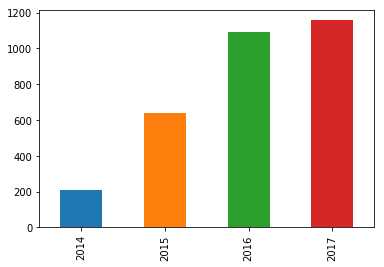

In [210]:
%matplotlib inline
df[(df['Opioid Related']) & (df['year'] != 2018)]['year']\
  .value_counts().sort_index().plot(kind="bar")

## Plot the number of fentanyl deaths by year, and the number of heroin deaths by year

- *Tip: You'll want to look up how to use `ylim` - it will let you set each graphic to use the same scale. This should be separate graphics.*
- *Tip: Pay attention to the numbers on your axes. `sort_index()` will be your friend.*
- *Tip: You should probably get rid of 2018*

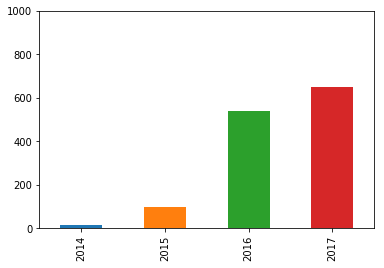

In [217]:
df[(df['Primary Cause'].str.contains('FENTANYL')) & (df['year'] != 2018)][
  'year']\
  .value_counts().sort_index().plot(kind='bar', ylim=[0,1000])

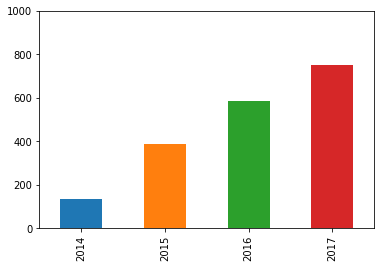

In [216]:
df[(df['Primary Cause'].str.contains('HEROIN')) & (df['year'] != 2018)][
  'year'] \
  .value_counts().sort_index().plot(kind='bar', ylim=[0, 1000])

## How does this compare to gun deaths?

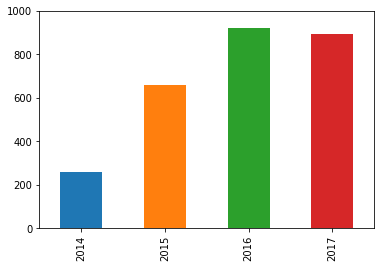

In [218]:
df[(df['Primary Cause'].str.contains('GUN')) & (df['year'] != 2018)][
  'year'] \
  .value_counts().sort_index().plot(kind='bar', ylim=[0, 1000])

## But hey: numbers can lie pretty easily!

The numbers are just so low in 2014 and much higher in 2017. What's going on there?

Well, maybe **there just isn't as much data from the earlier years**. Plot how many entries there are for each year.

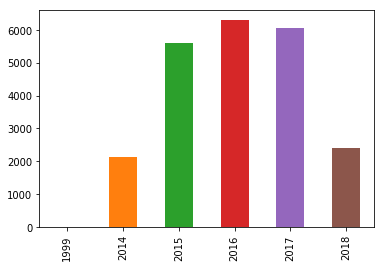

In [219]:
df['year'].value_counts().sort_index().plot(kind='bar')

And we don't know the best way to fix that up yet, so instead I'm going to give you a present.

# Is the true lesson here, don't move to Cook County, Illinois?

Cook County is basically Chicago. It's probably just certain areas that are trouble, right? Let's investigate that without even having a clue how mapping works.

## Fun bonus: Making cheating maps

### Make a new dataframe of every death in the actual city of Chicago

In [220]:
chicago_deaths = filter_by('Incident City', 'chicago')

### Confirm this new dataframe has 13,627 rows

In [221]:
chicago_deaths.shape

(13627, 21)

### Use lat and long in the worst way possible to make a map

Use `longitude` and `latitude` and `plot` to make a rough map of the city. Chicago [looks like this](https://en.wikipedia.org/wiki/File:DuPage_County_Illinois_Incorporated_and_Unincorporated_areas_Chicago_Highlighted.svg)

- *Tip: Use the `latitude` and `longitude` columns*
- *Tip: You don't want a line graph, of course. Or a bar. What kind is the kind with dots on it?*
- *Tip: Use something like like `figsize=(10,5)` to specify the height and width of the map (but, you know, with better numbers that make it look like chicago)*

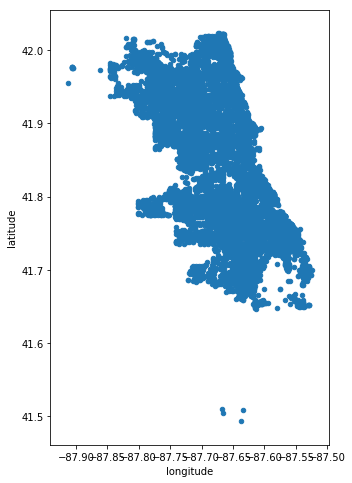

In [233]:
chicago_deaths.plot(kind='scatter', x='longitude', 
                                     y='latitude', 
                        figsize=(5,8))

## Now let's find out where to live

Make a map of every non-homicide death in Chicago, then plot the homicides on top of it.

Use the `ax=df.plot` trick from the beer cans assignment to plot all of the rows representing homicides vs non-homicides. You can use `color='red'` to make one of them red, and `alpha=0.05` to make each mark very transparent to allow them to layer on top of each other.

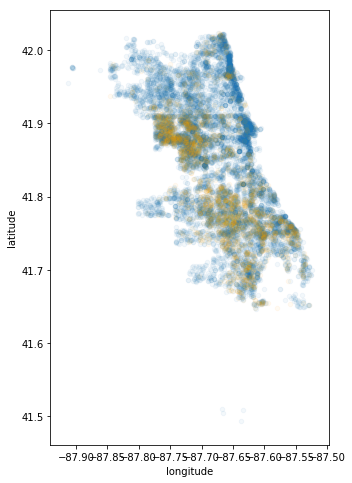

In [237]:
other_cause_plot = chicago_deaths[(chicago_deaths['Manner of Death'] !=
                'HOMICIDE')].plot(kind='scatter',
                                  x='longitude',
                                  y='latitude',
                                  figsize=(5, 8),
                                  alpha=0.05)
chicago_deaths[(chicago_deaths['Manner of Death'] ==
                'HOMICIDE')].plot(kind='scatter',
                                  x='longitude',
                                  y='latitude',
                                  figsize=(5, 8),
                                  ax=other_cause_plot,
                                  color='orange',
                                  alpha=0.05)

## Never tell anyone I let you do that.

But you want to see something actually completely legitimately insane?

**Chicago is one of the most segregated cities in America.** If you'd like to see this for yourself, make a map of `Race`. Plot black vs white in a way similar to what we did above.

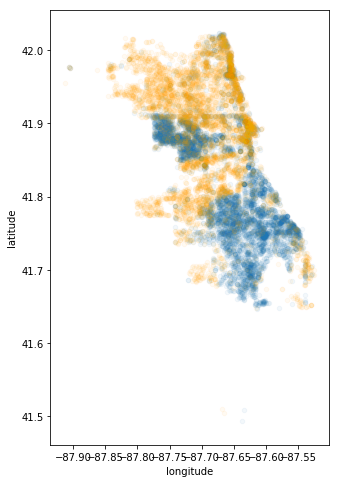

In [239]:
black_plot = chicago_deaths[chicago_deaths['Race'] == 'Black'].plot(
  kind='scatter',
  x='longitude',
  y='latitude',
  figsize=(5, 8),
  alpha=0.05)

chicago_deaths[chicago_deaths['Race'] != 'Black'].plot(
  kind='scatter',
  x='longitude',
  y='latitude',
  figsize=(5, 8),
  alpha=0.05,
  color='orange',
  ax=black_plot)


Yup.